Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Access the file uploaded in the Google Drive

In [2]:
#Uploaded the file to google drive and access it
pollution_file = "https://drive.google.com/uc?id=1YzDbDOTcEWYvCwehmMUEK5LQjohlV5Rf"
pollution_df = pd.read_csv(pollution_file)

# Display first few rows
pollution_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
pollution_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Make new data frame including only US data

In [4]:
us_df = pollution_df

In [5]:
#Analysing data which has United States as the country
non_usa = []


#Loop through each row and checks the country. If it is not the US, it will remove that row from the data.

for country in pollution_df.index:
  if pollution_df["Country"].iloc[country] != "United States of America":
    non_usa.append(country)

In [6]:
#removing the rows that are not the US
us_df = us_df.drop(non_usa).reset_index().drop(["index"], axis=1)

In [8]:
us_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
1,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate
2,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate
3,United States of America,Port Neches,34,Good,1,Good,19,Good,7,Good,34,Good
4,United States of America,Portales,77,Moderate,1,Good,34,Good,0,Good,77,Moderate


Data PreProcessing for US data frame

In [9]:
#checking for all null values in US data frame
us_df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

US Data Frame Analysis

Spread of AQI values

In [10]:
#Spread of the AQI values
us_df['AQI Category'].value_counts()

AQI Category
Moderate                          1715
Good                              1001
Unhealthy for Sensitive Groups     137
Unhealthy                           18
Hazardous                            1
Name: count, dtype: int64

<Axes: xlabel='AQI Category'>

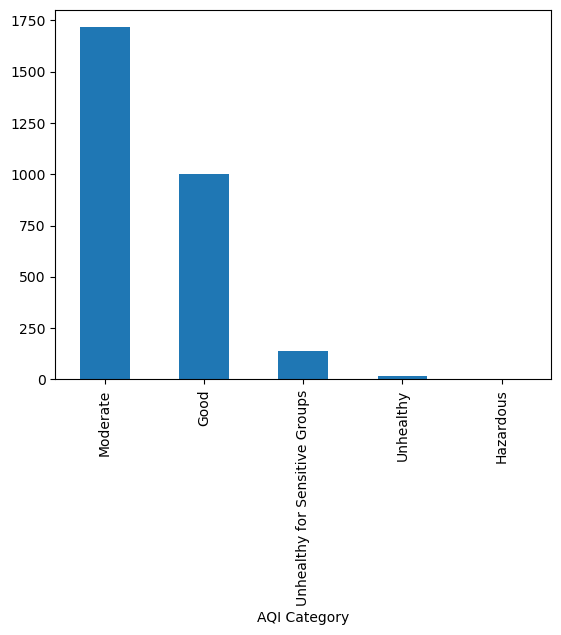

In [11]:
#Make it into a graph for visualization
us_df['AQI Category'].value_counts().plot.bar()

In [12]:
us_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,59.740599,1.456825,27.619777,8.541435,58.051532
std,22.822531,2.567693,13.160012,8.012248,23.966614
min,12.000000,0.000000,0.000000,0.000000,7.000000
25%,47.000000,1.000000,19.000000,3.000000,45.000000
50%,55.000000,1.000000,27.000000,6.000000,54.000000
75%,68.000000,2.000000,35.000000,12.000000,67.000000
max,500.000000,133.000000,125.000000,53.000000,500.000000


Get min AQI value city in US

In [13]:
us_df[us_df['AQI Value']==us_df['AQI Value'].min()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1148,United States of America,Provo,12,Good,0,Good,8,Good,12,Good,7,Good
